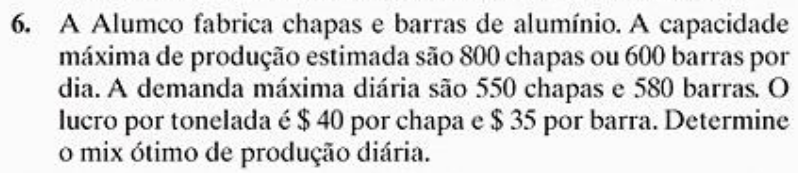

In [ ]:
%pip install cplex
%pip install docplex

In [ ]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Mix_Otimo_Producao_Alumco')

In [ ]:
# --- Parâmetros extraídos do enunciado ---

# Nomes dos produtos para referência
produtos = ['chapa', 'barra']

# Lucro por tonelada de cada produto
lucro_por_tonelada = {'chapa': 40, 'barra': 35}

# Demanda máxima diária para cada produto
demanda_maxima = {'chapa': 550, 'barra': 580}

# A capacidade de produção é de 800 chapas OU 600 barras.
# Modelamos isso como o percentual da capacidade total que cada unidade consome.
# 1 chapa consome 1/800 da capacidade total.
# 1 barra consome 1/600 da capacidade total.
uso_capacidade_por_unidade = {'chapa': 1/800, 'barra': 1/600}
limite_capacidade_total = 1 # Representa 100% da capacidade diária

In [ ]:
# 1. Variáveis de Decisão
# Quantidade a produzir de cada produto
qtd = model.continuous_var_dict(produtos, name='Qtd')


# 2. Função Objetivo
# Maximizar o lucro total
expressao_lucro = (lucro_por_tonelada[p] * qtd[p] for p in produtos)
soma_lucro_total = model.sum(expressao_lucro)
model.maximize(soma_lucro_total)


# 3. Restrições

# Restrição 1: Capacidade de Produção
# A soma das capacidades utilizadas não pode exceder 100% (ou 1).
expressao_uso_capacidade = (uso_capacidade_por_unidade[p] * qtd[p] for p in produtos)
soma_uso_capacidade = model.sum(expressao_uso_capacidade)
restr_capacidade_logica = soma_uso_capacidade <= limite_capacidade_total
model.add_constraint(restr_capacidade_logica, ctname='limite_capacidade_prod')

# Restrição 2: Limites de Demanda Máxima (uma para cada produto)
for p in produtos:
    restr_demanda_logica = qtd[p] <= demanda_maxima[p]
    model.add_constraint(restr_demanda_logica, ctname=f'demanda_max_{p}')

In [ ]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)